# Zestaw 1 - Regular expressions

## Zadanie 1

In [24]:
time_regex = r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b'
date_regex = r'\b([12]?[0-9]|3[01])\s(stycznia|styczeń|lutego|luty|marca|marzec|kwietnia|kwiecień|maja|maj|czerwca|czerwiec|lipca|lipiec|sierpnia|sierpień|września|wrzesień|października|październik|listopada|listopad|grudnia|grudzień)\b'

## Zadanie 2

In [3]:
import gzip
import json

def load_jsonl_gz(file_path):
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for line in f:
            yield json.loads(line)

file_path = 'fiqa-pl/corpus.jsonl.gz'
corpus = list(load_jsonl_gz(file_path))


In [4]:
corpus

[{'_id': '3',
  'title': '',
  'text': 'Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.',
  'metadata': {}},
 {'_id': '31',
  'title': '',
  'text': 'Tak więc nic nie zapobiega fałszywym ocenom poza dodatkową kontrolą ze strony rynku/inwestorów, ale istnieją pewne nowsze kontrole, które uniemożliwiają instytucjom korzystanie z nich. W ramach DFA banki nie mogą już polegać wyłącznie na ratingach kredytowych jako należytej staranności przy zakupie instrumentu finansowego, więc to jest plus. Intencją jest to, że jeśli instytucje finansowe wykonują swoją własną pracę, to *być może*

In [5]:
import re

def find_regex(regex, corpus):
    matches = []
    for elem in corpus:
        text = elem['text']
        if m := re.search(regex, text):
            matches.append((m, text))
    
    return matches

### Wystąpienia czasu

In [27]:
times = find_regex(time_regex, corpus)
print(len(times))
times

294


[(<re.Match object; span=(32, 37), match='17:57'>,
  'Napiszę do Ciebie [**2017-10-06 17:57:23 UTC**](http://www.wolframalpha.com/input/?i=2017-10-06 17:57:23 UTC Do czasu lokalnego), aby przypomnieć Ci o [**ten link.**](https://www.reddit.com/r/finance/comments/7354iz/roku_ipo_stock_price_closes_up_67_on_first_day_of/dnolw5y) [**3 INNE KLIKNIŁY TEN LINK** ](http://np.reddit.com/message/compose/?to=RemindMeBot&subject=Przypomnienie&message=[https://www.reddit.com/r/finance/comments/7354iz/roku_ipo_stock_price_closes_up_67_on_first_day_of/dnolw%5y !1 tydzień) aby wysłać wiadomość PW, aby otrzymać przypomnienie i zmniejszyć ilość spamu. ^(Rodzic komentujący może ) [^(usunąć tę wiadomość, aby ukryć się przed innymi.)](http://np.reddit.com/message/compose/?to=RemindMeBot&subject=Usuń Komentarz&message=Usuń! dnolwn7) _____ |[^ (Najczęściej zadawane pytania)](http://np.reddit.com/r/RemindMeBot/comments/24duzp/remindmebot_info/)|[^(Niestandardowe)](http://np.reddit.com/message/compose/?to =Re

### Wystąpienia dat

In [7]:
dates = find_regex(date_regex, corpus)
print(len(dates))
dates

748


[(<re.Match object; span=(1090, 1099), match='1 czerwca'>,
  'Kontrakty futures należą do większej klasy aktywów finansowych zwanych instrumentami pochodnymi. Instrumenty pochodne są nazywane takimi, ponieważ ich wypłaty zależą od ceny innych aktywów (finansowych lub rzeczywistych). Inne rodzaje instrumentów pochodnych to opcje kupna, opcje sprzedaży. Aktywa o stałym dochodzie, które naśladują zachowanie instrumentów pochodnych, to obligacje z opcją wykupu, obligacje z opcją sprzedaży itp. Kontrakt futures to kontrakt, który określa następujące elementy: Tak jak w przypadku każdego innego kontraktu, zaangażowane są dwie strony. Jedna strona zobowiązuje się do dostarczenia aktywów bazowych drugiej stronie w dniu wygaśnięcia w zamian za cenę kontraktów futures. Druga strona zobowiązuje się do zapłaty ceny futures w zamian za aktywa. Nie ma ceny, którą którakolwiek z dwóch stron płaci z góry za zawarcie umowy. Użyty język jest taki, że agent, który zobowiązał się do otrzymania dostawy akt

In [8]:
dates2 = find_regex(better_date_regex, corpus)
print(len(dates2))
dates2

748


[(<re.Match object; span=(1090, 1099), match='1 czerwca'>,
  'Kontrakty futures należą do większej klasy aktywów finansowych zwanych instrumentami pochodnymi. Instrumenty pochodne są nazywane takimi, ponieważ ich wypłaty zależą od ceny innych aktywów (finansowych lub rzeczywistych). Inne rodzaje instrumentów pochodnych to opcje kupna, opcje sprzedaży. Aktywa o stałym dochodzie, które naśladują zachowanie instrumentów pochodnych, to obligacje z opcją wykupu, obligacje z opcją sprzedaży itp. Kontrakt futures to kontrakt, który określa następujące elementy: Tak jak w przypadku każdego innego kontraktu, zaangażowane są dwie strony. Jedna strona zobowiązuje się do dostarczenia aktywów bazowych drugiej stronie w dniu wygaśnięcia w zamian za cenę kontraktów futures. Druga strona zobowiązuje się do zapłaty ceny futures w zamian za aktywa. Nie ma ceny, którą którakolwiek z dwóch stron płaci z góry za zawarcie umowy. Użyty język jest taki, że agent, który zobowiązał się do otrzymania dostawy akt

## Zadanie 3 - wykresy

In [9]:
time_matches = [e[0] for e in find_regex(time_regex, corpus)]
date_matches = [e[0] for e in find_regex(better_date_regex, corpus)]

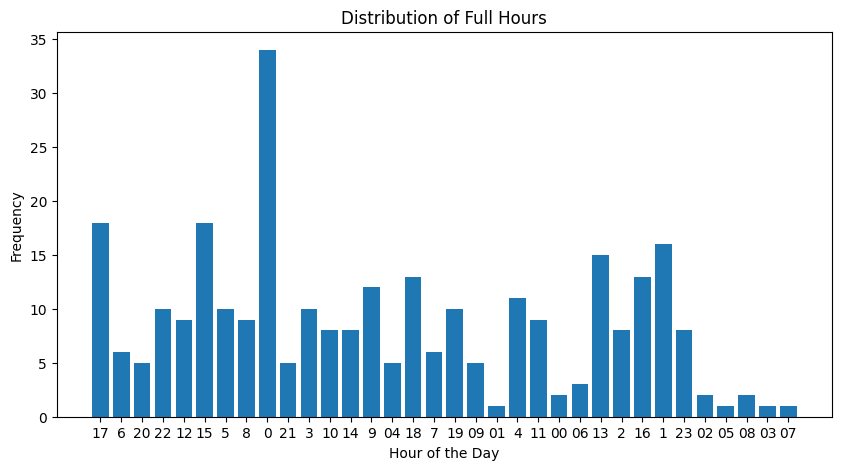

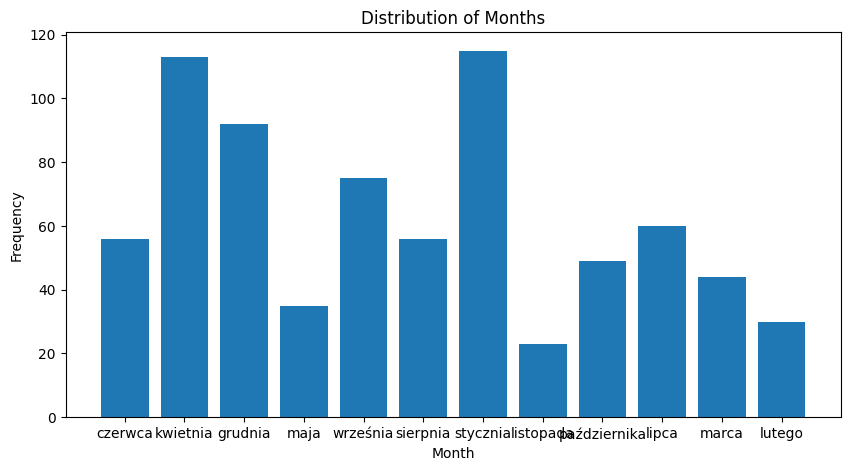

In [10]:
import matplotlib.pyplot as plt
from collections import Counter


full_hours = [time.group(1).split(':')[0] for time in time_matches if time]
hour_counts = Counter(full_hours)

months = [date.group(2) for date in date_matches if date]
month_counts = Counter(months)

plt.figure(figsize=(10, 5))
plt.bar(hour_counts.keys(), hour_counts.values())
plt.title('Distribution of Full Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(month_counts.keys(), month_counts.values())
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()


## Zadanie 4

In [11]:
kwiecien_regex = r'kwie(cień|tni(a|owi|em|u|e|ów|om|ami|ach)?)'

In [21]:
kwiecien_count = len(find_regex(kwiecien_regex, corpus))
kwiecien_count

263

## Zadanie 5

In [17]:
digit_kwiecien_regex = r'\d kwie(cień|tni(a|owi|em|u|e|ów|om|ami|ach)?)'
digit_kwiecien_count = len(find_regex(digit_kwiecien_regex, corpus))
digit_kwiecien_count

139

## Zadanie 6

In [23]:
not_digit_kwiecien_regex = r'(?<!\d )kwie(cień|tni(a|owi|em|u|e|ów|om|ami|ach)?)'
not_digit_kwiecien_count = len(find_regex(not_digit_kwiecien_regex, corpus))
not_digit_kwiecien_count

135

Czy liczba matchy tych szczgólnych regexów się sumują do ogólnego regexu?

In [22]:
digit_kwiecien_count + not_digit_kwiecien_count == kwiecien_count

False

## Zadanie 7

#### Model: GPT 4o

##### prompt: 
```text
Devise two regular expressions:
extracting times, e.g. recognizDevise two regular expressions:
extracting times, e.g. recognizing 20:30 as an instance of a time.
extracting dates, e.g. recognizing 20 września as an instance of a date.ing 20:30 as an instance of a time.
extracting dates, e.g. recognizing 20 września as an instance of a date.
```
Odpowiedź:
```python
time_regex = r'\b([01]?[0-9]|2[0-3]):[0-5][0-9]\b'
date_regex = r'\b([12]?[0-9]|3[01])\s(stycznia|styczeń|lutego|luty|marca|marzec|kwietnia|kwiecień|maja|maj|czerwca|czerwiec|lipca|lipiec|sierpnia|sierpień|września|wrzesień|października|październik|listopada|listopad|grudnia|grudzień)\b'
```
Komentarz: 
regex odnajdujący czas jest dokładnie taki sam jak mój (wziąłem go z mojej biblioteki helperów)
regex odnajdujący daty: mój ma zaletę uwzględniania daty z miesiącem w formie podstawowej

##### prompt:
```text
Plot:
for times create a bar plot for full hours.
for dates create a bar plot for months
```

##### odpowiedź:
```python
plt.figure(figsize=(10, 5))
plt.bar(hour_counts.keys(), hour_counts.values())
plt.title('Distribution of Full Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(month_counts.keys(), month_counts.values())
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()
```

##### prompt: "4. Compute the number of occurrences of kwiecień word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden)."
odpowiedź: `kwiec(ie[nń]|nia|niowi|niem|niu|nie|niom|niami|niach)`
Komentarz: 
to jest źle - pozwala na słowa "kwiecnia", "kwiecniowi" itp

##### prompt (w tej samej konwersacji co poprzedni prompt): 5. As in 4, but preceded by a number and a space.
odpowiedź: `\d+ \bkwiec(ie[nń]|nia|niowi|niem|niu|nie|niom|niami|niach)\b`
Komentarz: 
GPT kontynuował błąd z poprzedniej odpowiedzi, ale poprawnie dodał liczbę przed słowem "kwiecień"

##### prompt: "6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4."
Odpowiedź:
```text
(?<!\d+\s)\bkwiec(ie[nń]|nia|niowi|niem|niu|nie|niom|niami|niach)\b

Verifying the Results of 5 and 6

To verify if the results from query 5 (preceded by a number) and query 6 (not preceded by a number) sum to the total occurrences of "kwiecień" in any form, you can:

    Run the regular expression from query 5.
    Run the regular expression from query 6.
    Count the occurrences from each and check if their sum equals the total count from the original query in question 4 (which matches all forms of "kwiecień").
```
Komentarz:
GPT użył tej samej strategii rozwiązania zadania co ja czyli negative-lookbehind, ale użył znaku '\s' co nie jest w pełni zgodne z poleceniem


## Pytania:

### 1. Are regular expressions good at capturing times?
Tak, regex jest doś prosty i raczej łapie wszystkie przypadki. No chyba, że gdzieś w korpusie są godziny zapsane słowami.

### 2. Are regular expressions good at capturing dates?
Nie w takiej formie (słowny miesiąc) w języku polskim. Trzeba zwracacać uwagę na fleksję, a bardzo możliwe, że w tekście są inne przypadku których nie przewidziałem (np. "kwiecień" zapisany jako "kwi")

### 3. How one can be sure that the expression has matched all and only the correct expressions of a given type?
Nie może być. Można się upewniać manualnie weryfikując matche, ale nie ma gwarancji, że wszystkie zostały znalezione.

### 4. Is LLM able to generate regular expressions?
Tak, ale zawierają błędy, więc trzeba je weryfikować, a czytanie regexów nie jest zbyt przyjemne"